This calculation demonstrates that the average concentration can be used to represent an entire profile, as long at the rates are the same.

In [1]:
import numpy as np
from scipy.integrate import odeint
from pylab import *
from lmfit import *
%matplotlib inline

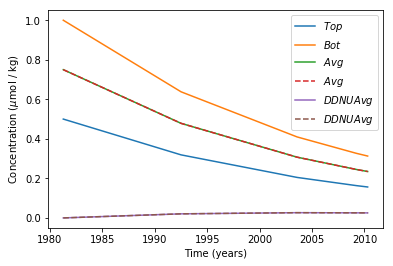

In [2]:
# Version of ODE with three-generation transformation and only three transfer terms
def dcdt(c, t, k):
    dfdt = np.zeros(3)
    dfdt[0] = c[0]* -k[0]
    dfdt[1] = c[1]* -k[1] + c[0]*k[0]
    dfdt[2] = c[2]* -k[2] + c[1]*k[1]
    return dfdt

# two part profile...top half has C0 = .5, bottom half has C0 = 1
# intial concentration for three constituents
k = np.array([.04, .06, .5])
C0bot = np.array([1., .0, .0])
C0top = np.array([.5, .0, .0])
C0avg = np.array([.75, .0, .0])

# time array
#te = linspace(0.0,100.,50)

# or, for discrete times that match Site 6C measurements:
te = np.array(( 1981.27, 1992.51, 2003.58, 2009.23, 2010.31 ))

# Compute time series 
Cetop = odeint(dcdt,C0top,te, args = (k,))
Ceavg = odeint(dcdt,C0avg,te, args = (k,))
Cebot = odeint(dcdt,C0bot,te, args = (k,))
# Compute the average of the time series for the simple profile 
Ceavg2 = 0.5*Cetop+0.5*Cebot

fig = plt.figure()
plt.plot(te,Cetop[:,0],label='$Top$')
plt.plot(te,Cebot[:,0],label='$Bot$')
plt.plot(te,Ceavg[:,0],label='$Avg$')
plt.plot(te,Ceavg2[:,0],'--',label='$Avg$')
plt.plot(te,Ceavg[:,2],label='$DDNU Avg$')
plt.plot(te,Ceavg2[:,2],'--',label='$DDNU Avg$')

plt.xlabel('Time (years)')
plt.ylabel('Concentration ($\mu$mol / kg)')
plt.legend(loc='upper right')